In [2]:
!pip install mplsoccer

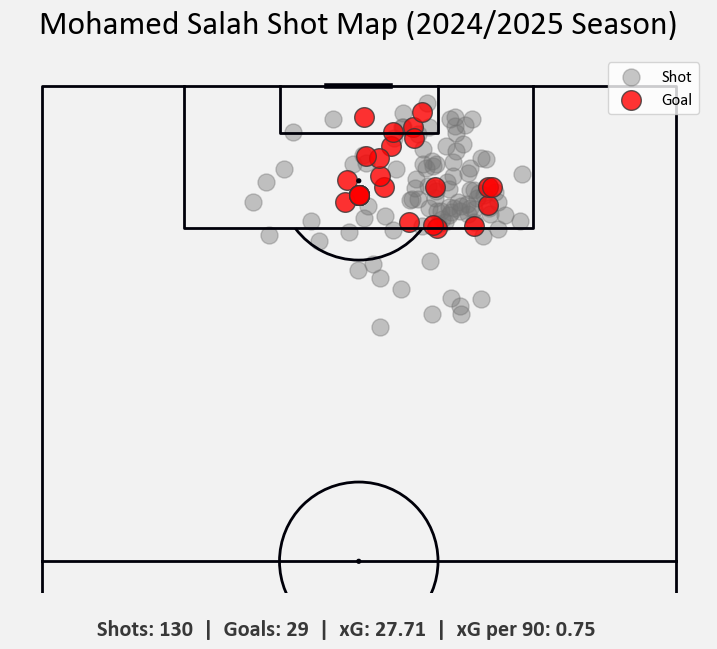

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# Load the Mohamed Salah shot data
# The original script loaded data for Erling Haaland, but we've changed it
# to use the provided CSV file for Mohamed Salah.
try:
    df = pd.read_csv('Mohamed_Salah_shots.csv')
except FileNotFoundError:
    print("Error: 'Mohamed_Salah_shots.csv' not found. Make sure the file is in the same directory as the script.")
    exit()

# Filter the data for the 2024/2025 season
# The 'season' column represents the starting year of the season.
df = df[df['season'] == 2024]


# The coordinate system in the data is based on a 0-1 scale.
# We need to scale these coordinates to the pitch dimensions used by mplsoccer (120x80 yards).
df['x_scaled'] = df['X'] * 120
# Invert the y-coordinate to flip the shots from left to right
df['y_scaled'] = (1 - df['Y']) * 80

# Separate the dataframe into goals and other shots
# The 'result' column tells us the outcome of the shot.
goals = df[df['result'] == 'Goal']
other_shots = df[df['result'] != 'Goal']

# --- Calculate Statistics ---
total_shots = len(df)
goals_count = len(goals)
# Sum the 'xG' values for all shots and round to two decimal places.
total_xg = round(df['xG'].sum(), 2)

# --- xG per 90 Calculation ---
# NOTE: The shots dataset does not contain total minutes played.
# For an accurate xG per 90, you must replace the placeholder value below
# with the actual total minutes Salah played in the 2024/2025 season.
number_of_matches = df['match_id'].nunique()
# We are ESTIMATING minutes played. This is a placeholder.
total_minutes_played = number_of_matches * 90  # <-- IMPORTANT: REPLACE WITH ACTUAL MINUTES PLAYED

# Calculate xG per 90, avoiding division by zero
if total_minutes_played > 0:
    xg_per_90 = round((total_xg / total_minutes_played) * 90, 2)
else:
    xg_per_90 = 0


# --- Plotting the Shot Map ---

# Set up the pitch using mplsoccer's VerticalPitch
# The half=True argument will draw only the attacking half of the pitch.
pitch = VerticalPitch(pitch_type='statsbomb', line_color='#000009', line_zorder=2, pitch_color='#f2f2f2', half=True)
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#f2f2f2')

# Plot the non-goal shots
# We use scatter to place markers for each shot on the pitch.
# These are plotted in a semi-transparent grey.
pitch.scatter(other_shots['x_scaled'], other_shots['y_scaled'],
              alpha=0.4, s=150, color="#747474", ax=ax, label='Shot')

# Plot the goals
# Goals are plotted in a distinct color (red) to stand out.
pitch.scatter(goals['x_scaled'], goals['y_scaled'],
              alpha=0.8, s=200, color="#ff0000", ax=ax, label='Goal', edgecolors='#383838')

# Add a title to the plot
# Using the 'Calibri' font for a clean, modern look.
ax.set_title("Mohamed Salah Shot Map (2024/2025 Season)", fontsize=24, pad=15, fontname="Calibri")

# Add a legend to distinguish goals from other shots
ax.legend(loc='upper right', prop={'family': 'Calibri', 'size': 12})

# Add the statistics text at the bottom of the figure
stats_text = f"Shots: {total_shots}  |  Goals: {goals_count}  |  xG: {total_xg}  |  xG per 90: {xg_per_90}"
fig.text(0.5, 0.05, stats_text, ha="center", fontsize=16, color="#383838", fontweight='bold', fontname="Calibri")

# Display the plot
plt.show()

